In [14]:
import pandas as pd
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

def create_geo_dataframe_for_party(party):
    wahllokale = gpd.read_file('data/Ansbach_Wahllokale.geojson')
    stimmen = pd.read_csv('data/stimmen_europawahl_2024.csv', sep=';')
    lokal_stimmen = wahllokale.name.map(lambda n:  stimmen[stimmen['Gebietsname'].str.contains(n)][party].median())
    data = {'name': wahllokale.name, 'geometry': wahllokale.geometry, 'stimmen': lokal_stimmen}
    gdf = gpd.GeoDataFrame(pd.DataFrame(data=data), geometry="geometry")
    return gdf

def plot_votes_for_party(party):
    gdf = create_geo_dataframe_for_party(party)
    ansbach_shape = gpd.read_file('data/Ansbach_Stadt.geojson')
    ax = geoplot.webmap(ansbach_shape, projection=gcrs.WebMercator(),figsize=(14, 10))
    ax = geoplot.polyplot(ansbach_shape, projection=gcrs.WebMercator(),ax=ax)
    geoplot.pointplot(gdf, projection=gcrs.AlbersEqualArea(), 
                      hue='stimmen', scale='stimmen',
                      legend_var='hue', 
                      legend=True, 
                      cmap='plasma', 
                      limits=(5, 10),
                      extent=ansbach_shape.geometry.total_bounds,
                      ax=ax)



Skipping field lan_code: unsupported OGR type: 5
Skipping field lan_name: unsupported OGR type: 5
Skipping field krs_code: unsupported OGR type: 5
Skipping field krs_name: unsupported OGR type: 5
Skipping field krs_name_short: unsupported OGR type: 5


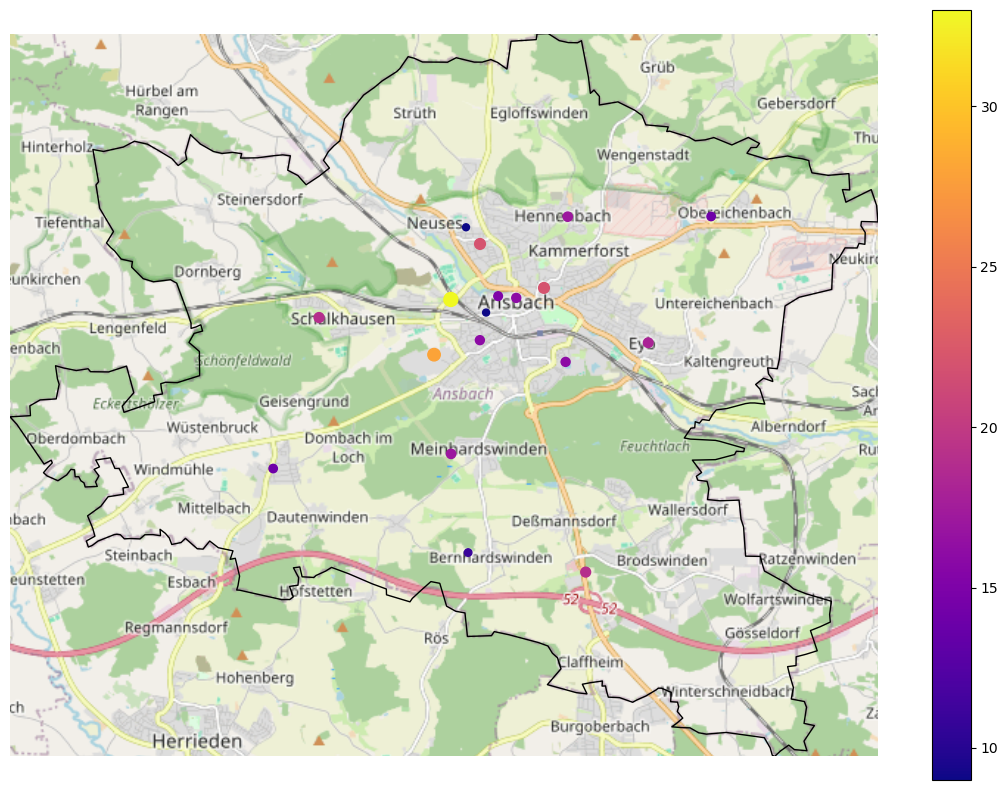

In [16]:
plot_votes_for_party('D28')